**Dataset:** This lab will use a dataset that represents water flow out of a dame versus change of water level. The dataset is uploaded in iLearn. You need to upload it to your Google Colab. 

**Step-1: Import Libraries:** The first step in any project is to import the libraries we are going to use

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.io import loadmat
#set default figure size
mpl.rcParams['figure.figsize'] = (12, 8)

**Step-2: Load the Data:** The next step is to load the data. While loading the data, let's also insert a column of ones to be the first column in the feature set. This column represents $X_0=1$, which will be multiplied by $\theta_0$.

In [5]:
data = pd.read_csv('Lab2_dataset.csv')
data_train = data.loc[0:11,['X', 'y']]
data_test = data.loc[0:20,['Xtest', 'ytest']]
data_val = data.loc[0:20,['Xval', 'yval']]

# Include a column of 1s in X to represent X_0 that will be multiplied by theta_0
X_train = np.c_[np.ones_like(data_train['X']), data_train['X']]
y_train = np.c_[data_train['y']]

X_val = np.c_[np.ones_like(data_val['Xval']), data_val['Xval']]
y_val = np.c_[data_val['yval']]

X_test = np.c_[np.ones_like(data_test['Xtest']), data_test['Xtest']]
y_test = np.c_[data_test['ytest']]

*Explore the data:* Let's look at the data: 

In [6]:
print('X_train:') 
print(X_train)
print('y_train:')
print(y_train)

X_train:
[[  1.     -15.9368]
 [  1.     -29.153 ]
 [  1.      36.1895]
 [  1.      37.4922]
 [  1.     -48.0588]
 [  1.      -8.9415]
 [  1.      15.3078]
 [  1.     -34.7063]
 [  1.       1.3892]
 [  1.     -44.3838]
 [  1.       7.0135]
 [  1.      22.7627]]
y_train:
[[ 2.1343]
 [ 1.1733]
 [34.3591]
 [36.838 ]
 [ 2.809 ]
 [ 2.1211]
 [14.7103]
 [ 2.6142]
 [ 3.7402]
 [ 3.7317]
 [ 7.6277]
 [22.7524]]


*Plot the data:* It is often useful to create a scatter plot of your data. Sometimes this helps identify the best polynomial order that fits your data. For that, we will create a function that we can use to plot our data. Here, we will create a general plot function that we can use to plot the data and later when we find the optimal model, we can also use the function to plot the optimal model on the same Figure with that data. The if condition in this function is intended to help us later when we try to plot the developed linear regression model on the scatter plot of the training data. Note here: once we know our model  $\theta_0 + \theta_1 X_1$, we will substitute by a rane of $X$  to find our line and plot it on the data. 

In [7]:
def plotData(X, y, theta = np.array(([0],[0])), reg = 0):
    plt.figure(figsize=(12, 8))
    plt.scatter(X[:, 1], y, s = 50, c = 'red', marker = 'x', linewidths = 1, label = 'Data')
    plt.grid(True)
    plt.title('Water Flow Data')
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    if theta.any() != 0:
        plt.plot(np.linspace(X.min(), X.max()), theta[0] + theta[1] * np.linspace(X.min(), X.max()), 
                                                 label = 'Optimized linear fit')
        plt.title('Water Data: Linear Fit')
        
    plt.legend()

Now, let's use the plot function: 

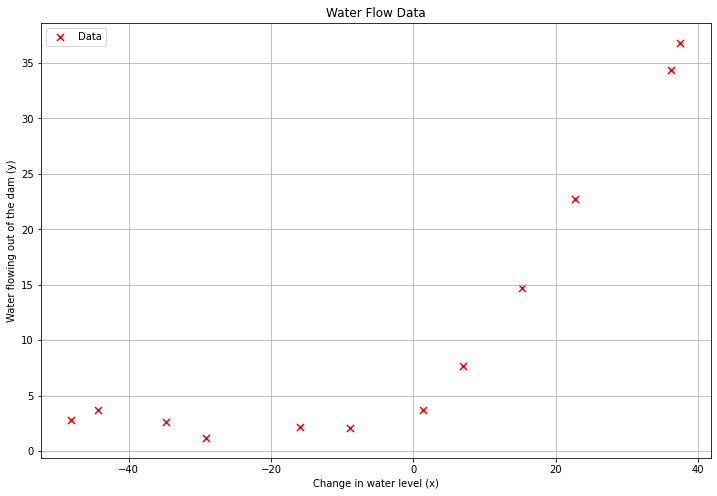

In [8]:
plotData(X_train, y_train)

**Step-3: Implement a Linear Regression Model:** 

*Step-3.1: Cost Function and Gradient:* Let's implement a function to calculate the cost $J$. This will be useful later in most of our next steps. This function will return the cost value. This is a general implementation that works even for regularized functions.

In [9]:
def cost(theta, X, y, reg = 0):
    m = y.size
    f = np.dot(X,theta).reshape((m, 1))
    J1 = (1 / (2 * m)) * np.sum(np.square(f - y))
    J2 = (reg / (2 * m)) * theta[1:].T.dot(theta[1:])
    J = J1 + J2
    grad = ((1 / m)*(X.T.dot(f - y)) + (reg / m) * np.r_[[[0]], theta[1:].reshape(-1, 1)]).ravel() 
    return J, grad

*Step-3.2: Gradient Descent Algorithm:* Next, we implement the iterations of the gradient descent.  

In [10]:
def gradient_descent(alpha, x, y, numIterations):
    m = y.size 
    theta = np.ones(2)
    for iter in range(0, numIterations):
        J, grad = cost(theta, x, y, reg = 0) 
        print(iter, J)             
        theta = theta - alpha * grad  # update
    return theta

Let's use the gradient descent function to get $\theta$: 

In [11]:
alpha = 0.001 # learning rate
theta = gradient_descent(alpha, X_train, y_train, 10000)

Streaming output truncated to the last 5000 lines.
5000 22.378235573637248
5001 22.378227164102473
5002 22.378218770865885
5003 22.378210393895902
5004 22.378202033160992
5005 22.3781936886297
5006 22.378185360270606
5007 22.378177048052393
5008 22.378168751943754
5009 22.37816047191348
5010 22.378152207930412
5011 22.378143959963438
5012 22.378135727981533
5013 22.378127511953707
5014 22.37811931184904
5015 22.37811112763668
5016 22.37810295928582
5017 22.378094806765723
5018 22.378086670045693
5019 22.378078549095136
5020 22.378070443883473
5021 22.378062354380198
5022 22.37805428055487
5023 22.378046222377108
5024 22.37803817981659
5025 22.378030152843042
5026 22.378022141426257
5027 22.378014145536078
5028 22.378006165142423
5029 22.37799820021526
5030 22.37799025072461
5031 22.377982316640562
5032 22.377974397933237
5033 22.37796649457286
5034 22.377958606529663
5035 22.37795073377399
5036 22.377942876276187
5037 22.3779350340067
5038 22.377927206936
5039 22.37791939503464
5040 22

*Step-3.3: Plot the Data and the Model:* Now, Let's plot the linear regression model on our training data

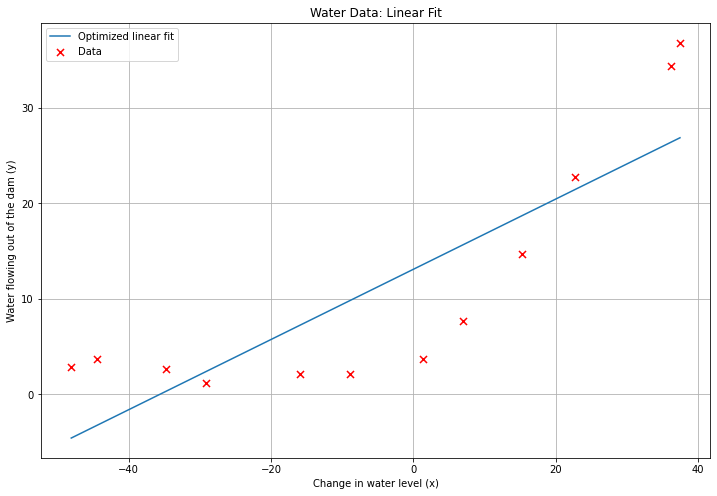

In [12]:
plotData(X_train, y_train, theta)

**Another Way to Find the Model Parameters:** In Step-3.2 (as in the lecture), we found the model parameters $\theta$ using Gradient Descent Algorithm. Here, we will try another way to find the model parameters. Remember that finding the model parameters requires solving $\min_{\theta} J$. There are built-in functions in python that can solve minimization problems (instead of using Gradient Descent). We will try this here. 

In [13]:
from scipy.optimize import minimize
def optimalTheta(theta, X, y, reg = 0):
    #Nelder-Mead yields best fit
    res = minimize(fun = cost, x0 = theta, args = (X, y, reg), method = 'Nelder-Mead', jac = True)
    return res.x

Then, we use our new function to find $\theta$

In [14]:
initial_theta = np.ones((X_train.shape[1], 1))
opt_theta = optimalTheta(initial_theta, X_train, y_train)
print("Optimized theta: {0}".format(opt_theta))

Optimized theta: [13.0879157   0.36777795]


/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


And we plot our model

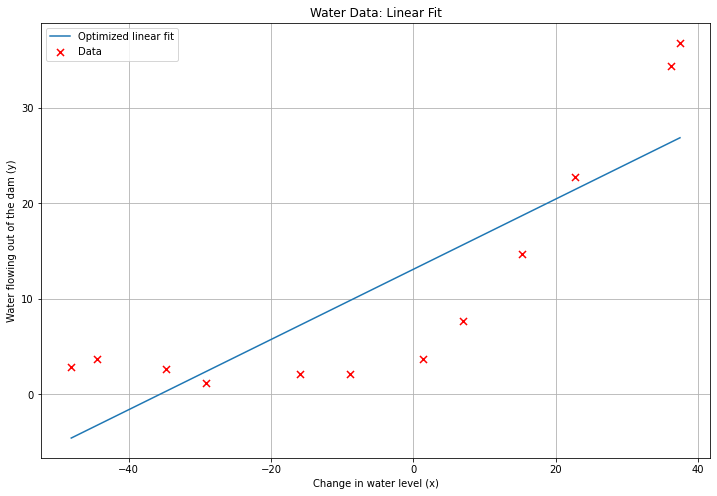

In [15]:
plotData(X_train, y_train, opt_theta)

Note that this result is identical to the one we got using the Gradient Descent method. Both technqiues minimize the cost function to find $\theta$. 

*Step-3.4: Learning Curves:* Let's implement a function to plot the learning curves. We will do a for loop on the number of training examples. Each time, we will find the optimal $\theta$ values using the current set of train data, calculate the cost function (error) on train and validation data, and save the train and validation errors in arrays to plot them.  

In [16]:
def plotLearningCurve(theta, X, y, Xval, yval, reg = 0):
    m = y.size
    
    error_train = np.zeros((m, 1))
    error_val = np.zeros((m, 1))
    
    example_num = np.arange(1, (X.shape[0] + 1))
    for i in np.arange(m):
        
        opt_theta = optimalTheta(theta, X[:i + 1], y[:i + 1], reg)
        error_train[i] = cost(opt_theta, X[:i + 1], y[:i + 1], reg)[0]
        error_val[i] = cost(opt_theta, Xval, yval, reg)[0]
    
    plt.figure(figsize = (12, 8))
    plt.plot(example_num, error_train, label = 'Training Error')
    plt.plot(example_num, error_val, label = 'Validation Error')
    plt.title('Learning Curve: No Regularization')
    if reg != 0:
        plt.title('Learning Curve: Lambda = {0}'.format(reg))
    plt.xlabel('Number of training examples')
    plt.ylabel('Mean Square Error')
    plt.legend()
    plt.grid(True)

Now, let's plot the learning curves

/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


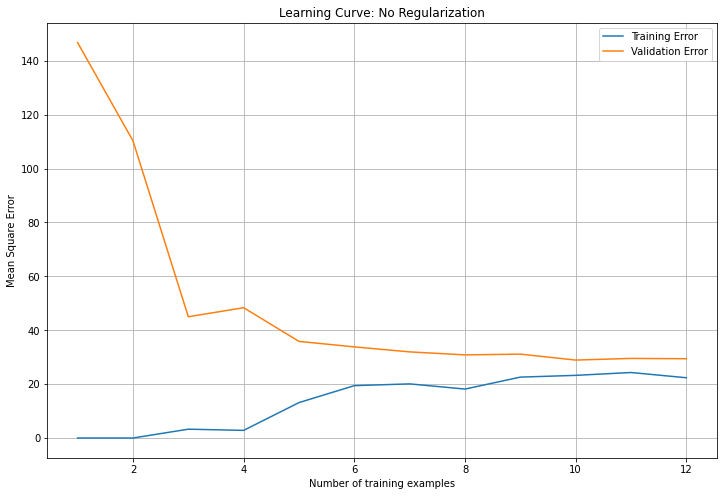

In [17]:
initial_theta = np.ones((X_train.shape[1], 1))
plotLearningCurve(initial_theta, X_train, y_train, X_val, y_val)

**Guidelines for Assignment-2**

In the following, I will provide some guidelines related to the questions in Assignment-2 (in case you could not answer the questions). I can see that most of the class correctly answered Q-1, so in what follows I will focus on Q-2 and Q-3. 

***Question-2:*** Let's use the linear regression built-in function in sklearn: 

In [18]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train[:, 1].reshape(-1, 1), y_train.ravel())

LinearRegression()

Note: when you want to use this model, you should later use lr.predict and apply your test data.

Now, let's plot the two models we got (from sklearn and from our own implementation) and compare them.

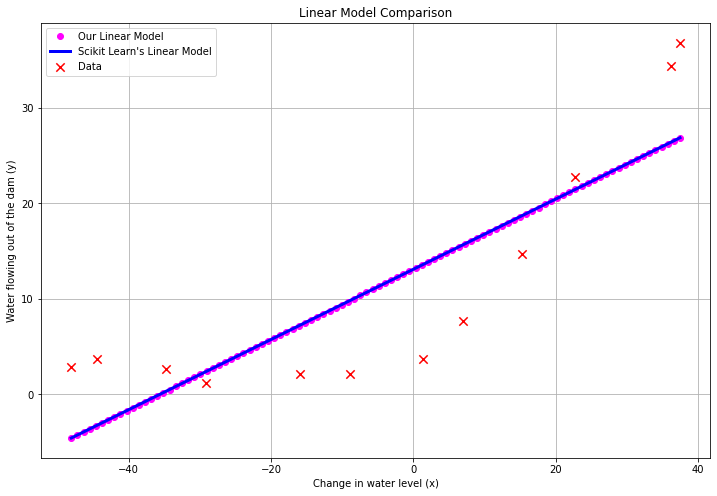

In [19]:
x_range = np.linspace(X_train.min(), X_train.max(), 100)
plt.figure(figsize = (12, 8))
plt.plot(x_range, opt_theta[0] + opt_theta[1] * x_range, 'o', c = 'magenta', label = 'Our Linear Model')
plt.plot(x_range,  lr.intercept_+ lr.coef_ * x_range, c  = 'blue', linewidth = 3,
         label = "Scikit Learn's Linear Model")
plt.scatter(X_train[:,1], y_train, s = 70, c = 'red', marker = 'x', linewidths = 1, label = "Data")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Linear Model Comparison')
plt.legend()
plt.grid(True)

***Question-3:*** let's implement a feature mapping and scaling function. It will take X append to it more columns to calculate more features (as a higher degree of X), then do a scaling. The scaling here is done using standardization. You can also do it using normalization. 

In [20]:
def polyFeatures(X, p):
    for i in np.arange(p):
        dim = i + 2
        X = np.insert(X, X.shape[1], np.power(X[:,1], dim), axis = 1)
    
    X_norm = X
    #column wise
    means = np.mean(X_norm, axis=0)
    X_norm[:, 1:] = X_norm[:, 1:] - means[1:]
    stds = np.std(X_norm, axis = 0)
    X_norm[:, 1:] = X_norm[:, 1:] / stds[1:]
    
    return X, X_norm

In [21]:
degree = 8

Now, let's implement a function to develop a polynomial regression model. This function will first create the higher degree features, scale them, find the optimal $\theta$, and then plot the polynomial function on the scatter training data.

In [22]:
def plotFit(X, y, degree, num_points, reg = 0):
    X_poly = polyFeatures(X, degree)[1]
    starting_theta = np.ones((X_poly.shape[1], 1))
    opt_theta = optimalTheta(starting_theta, X_poly, y, reg)
    x_range = np.linspace(-55, 50, num_points)
    x_range_poly = np.ones((num_points, 1))
    x_range_poly = np.insert(x_range_poly, x_range_poly.shape[1], x_range.T, axis = 1)
    x_range_poly = polyFeatures(x_range_poly, len(starting_theta)-2)[0]
    y_range = x_range_poly @ opt_theta
    plotData(X, y)
    plt.plot(x_range, y_range, "--", color = "blue", label = "Polynomial regression fit")
    plt.title('Polynomial Regression Fit: No Regularization')
    if reg != 0:
        plt.title('Polynomial Regression Fit: Lambda = {0}'.format(reg))
    plt.legend()

/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


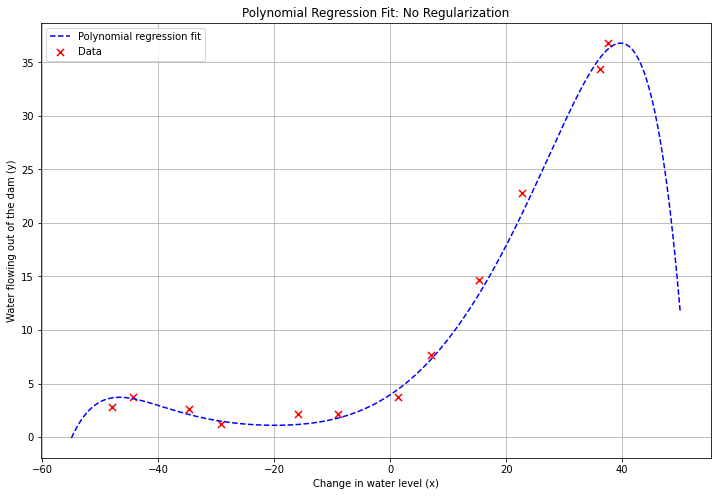

In [23]:
plotFit(X_train, y_train, degree, 1000)

Let's plot the learning curves for polynomial regression. You need first to create the higher degree features for train and validation data. Then call our learning curve function that we implemented before. You will see the training error is almost $0$ and validation error is high (with some gap from training error). This is an overfitted model.

/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


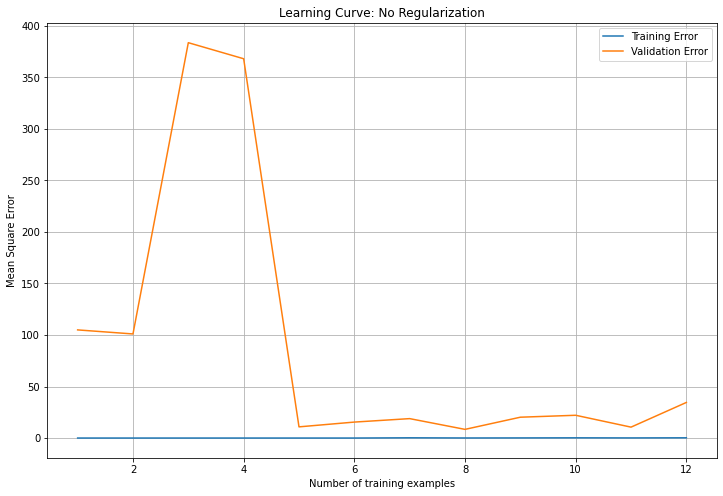

In [24]:
X_poly = polyFeatures(X_train, degree)[1]
X_poly_val = polyFeatures(X_val, degree)[1]
starting_theta = np.ones((X_poly.shape[1], 1))
plotLearningCurve(starting_theta, X_poly, y_train, X_poly_val, y_val)

Now, let's do polynomial regression when regularization parameter $\lambda \neq 0$. Here, let's make $\lambda=1$.

/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


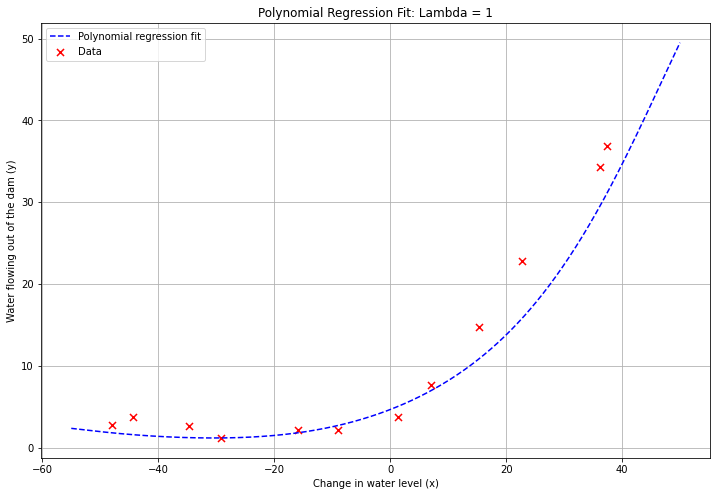

In [25]:
plotFit(X_train, y_train, degree, 1000, 1)

Let's see the learning curves in this case. You will find the trainign error increased but not so much (able to learn but also able to generalize) and the validation error reduced than before (better generalization). Hence, the model with $\lambda=1$ is better than $\lambda=0$.

/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


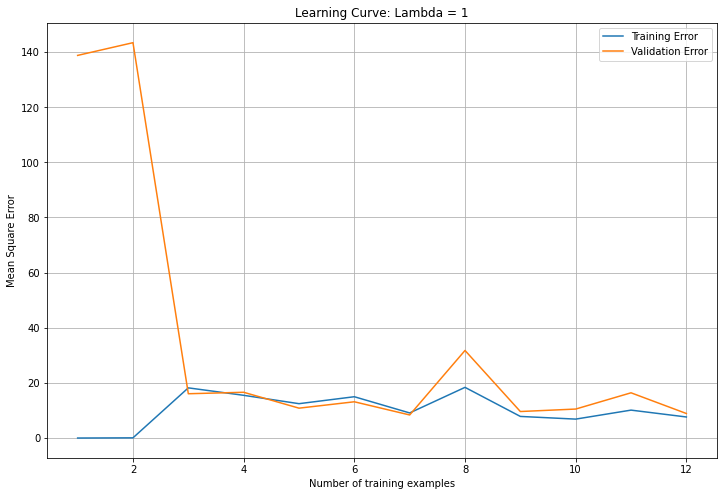

In [26]:
plotLearningCurve(starting_theta, X_poly, y_train, X_poly_val, y_val, 1)

Now, let's see what happen with high $\lambda=100$. This should be an example of underfitting. 

/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


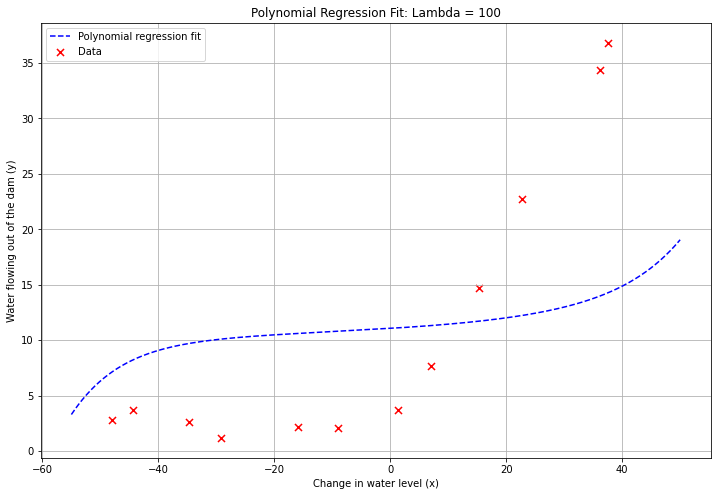

In [27]:
plotFit(X_train, y_train, degree, 1000, 100)

/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


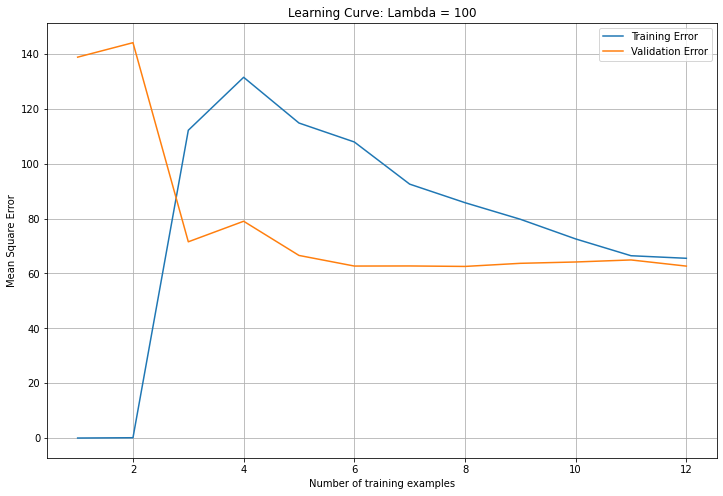

In [28]:
plotLearningCurve(starting_theta, X_poly, y_train, X_poly_val, y_val, 100)